In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file = open('network_input.csv') ## load the file
data= pd.read_csv(file) ## read it as a pandas data frame
data

,Microorganisms,Product
0,C. autoethanogenum,Acetone
1,C. autoethanogenum,Isopropanol
2,A. woodii,Acetate
3,A. woodii DSM1030,Acetate
4,C. ljungdahlii,n-Butanol
5,C. ljungdahlii,Ethanol
6,M. trichosporium OB3b,PHB
7,M. trichosporium OB3b,Methanol
8,Methylomonas sp. strain 16a,Astaxanthin
9,Methylomonas sp. DH-1,Methanol


In [5]:
unique_microbe = data["Microorganisms"].unique() ##choosing the unique microbes from the data for defining the nodes
unique_met = data["Product"].unique()  ##choosing the unique metabolites from the data for defining the nodes

microbe= unique_microbe.tolist() ##Converting the unique microbes into a list
metabolites = unique_met.tolist() ## converting the unique metabolites into a list
interactions = list(zip(data["Microorganisms"], data["Product"])) ##defining the microbe-metabolite interaction through list joining

In [6]:
##Defining a directed network, nodes and edges

microbe_met_network = nx.DiGraph() ##Generating a directed network of metabolite productions by each microbes
microbe_met_network.add_nodes_from(microbe, type = "Microbe") ## Defining microbial nodes 
microbe_met_network.add_nodes_from(metabolites, type = "metabolites") ## Defining metabolites nodes
microbe_met_network.add_edges_from(interactions) ##Defining edges with metabolite production information of each micorbe

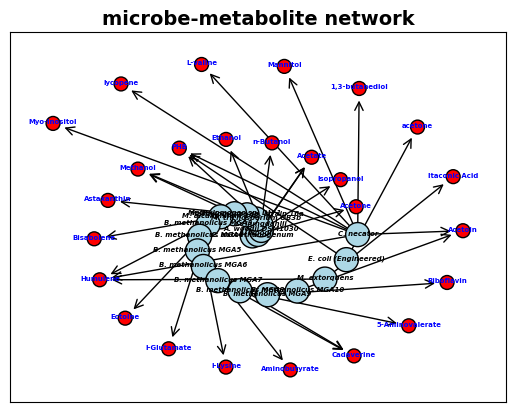

In [7]:
#strc= nx.spring_layout(microbe_met_network) ##defining network structural layout
strc= nx.spiral_layout(microbe_met_network)
#strc = nx.circular_layout(microbe_met_network)

node_colors = ["lightblue" if microbe_met_network.nodes[node]["type"] == "Microbe" else "red" for node in microbe_met_network.nodes] # Difining different color code for microbe and metabolite nodes 
node_size = [300 if microbe_met_network.nodes[node]["type"] == "Microbe" else 100 for node in microbe_met_network.nodes] # Difining different size for microbe and metabolite nodes 

nx.draw_networkx_nodes(microbe_met_network, strc, node_color=node_colors, node_size=node_size, edgecolors="black") ## Defining node properties


nx.draw_networkx_edges(microbe_met_network, strc, arrowstyle="->", arrowsize=15, edge_color="black") ## defining edge proterites


## Improving visualization
for node, (x, y) in strc.items():
    font_style = 'italic' if microbe_met_network.nodes[node]["type"] == "Microbe" else 'normal'
    font_color = 'black' if microbe_met_network.nodes[node]["type"] == "Microbe" else 'blue'
    plt.text(x, y, node, fontsize=5, fontstyle=font_style, fontweight = 'bold', color = font_color, ha= 'center')

plt.savefig("microbe_met_network.png", dpi=600,) ## Saving the plot



plt.title("microbe-metabolite network", fontsize=14, fontweight="bold") ##defining plot tile
plt.show() # Display the plot
